# Problem 4 - Regression over Autoregressive Forecast

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description
- <b>Consider a set of stochastic variables <i>X</i> and an electrical quantity <i>y</i> dependent on such variables for which timeseries data are available (both for the variables and the quantity) and discover an accurate predictor for <i>y</i> based on the forecasts of <i>X</i>.<b>

    _______________________________________________________________________________________________________________________

Considered "Kite" 5 Bus Network

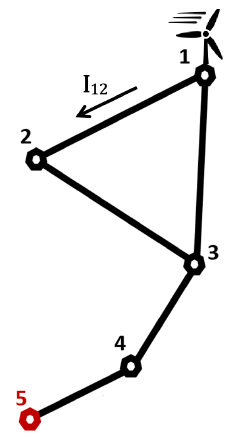

- <b>Implementation<b>

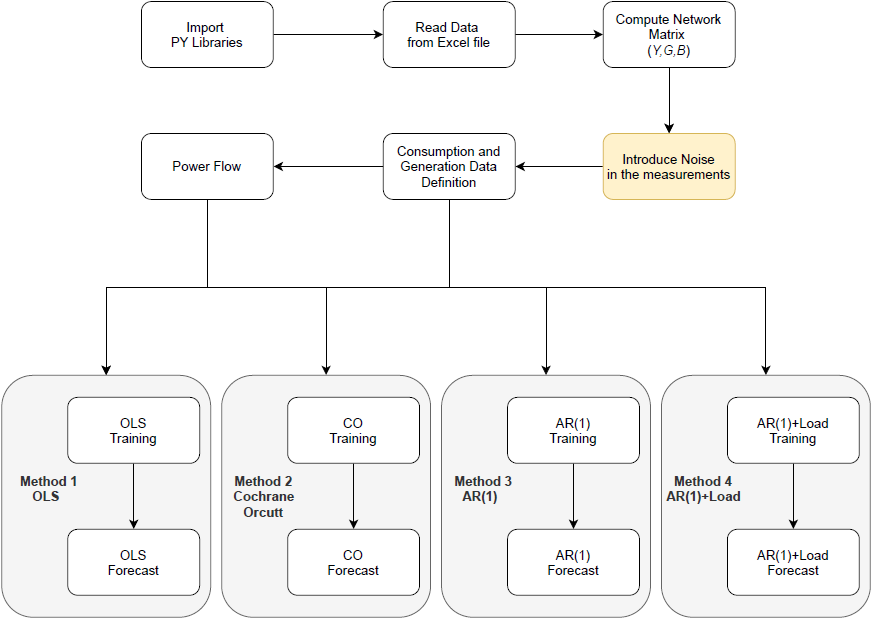

<b>Import Python Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Parameters

In [13]:
networkFactor = 100    # To change the characteristics of the network (Y)
cosPhi=0.95            # Value of teta
time=24                # Training Period  
timeForecast=12        # Test Period

<b>Import data (From Excel file)

In [14]:
Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Info', header=None))
# Information about the slack bus
SlackBus=Info[0,1]
print ("Slack Bus: ", SlackBus,"\n")

# Network Information
Net_Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Y_Data'))
print ("Lines information (Admitances)\n", Net_Info, "\n")

#Power Information (Train)
Power_Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Load(t,Bus)'))
Power_Info = np.delete(Power_Info,[0],1)
print ("Power consumption information (time, Bus)\n", Power_Info, "\n")

#Power Information (Test)
Power_Test = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Test_Load(t,Bus)'))
Power_Test = np.delete(Power_Test,[0],1)
print ("Power consumption information (time, Bus)\n", Power_Test, "\n")

P=np.dot(-Power_Info,np.exp(complex(0,1)*np.arccos(cosPhi)))
I=np.conj(P[2,:])


P=np.dot(-Power_Info,np.exp(complex(0,1)*np.arccos(cosPhi)))
print(P)
I=np.conj(P[2,:])



Slack Bus:  5 

Lines information (Admitances)
 [[1 2 '0,01-0,1i']
 [1 3 '0,02-0,2i']
 [2 3 '0,03-0,2i']
 [3 4 '0,03-0,2i']
 [4 5 '0,02-0,2i']] 

Power consumption information (time, Bus)
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]
 [0.684 0.528 0.256 0.44 ]] 

Power consumption information (time, Bus)
 [[0.18  0.06  0.188 0.132]
 [0.1   0.06  0.992 0.132]
 [0.388 0.1   1.576 0.132]
 [0.28  0.196 0.08  1.94 ]
 [0.5   0.184 0.064 0.572]
 [1.16  0.108 0.064 0.188]
 [1.036 0.06  0.068 0.08 ]
 [1.036 0.064 0.112 0.064]
 [1.768 0.064 0.2   0.068]
 [0.804 0.092 0.184 0.064]
 [0.824 0.196 0.088 0.096]
 [0.52  0.188 0.064 0.196]
 [0.184 0.104 0.068 0.192]] 

[[-0.3154-0.10366697j -0.0608-0.01998399j -0.0798-0.02622899

<b>Admittance Matrix(<i>Y</i>); Conductance Matrix(<i>G</i>); Susceptance Matrix(<i>B</i>)

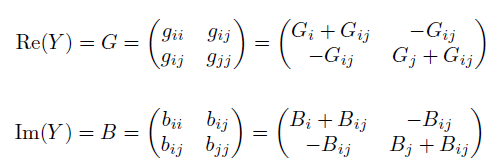

In [15]:
# Determine the number of Bus
nBus=max(np.max(Net_Info[:,0]),np.max(Net_Info[:,1]))

# Create the variable number of lines and the admitance matrix (Y)
nLines=Net_Info.shape[0]

Y=np.zeros((nBus,nBus), dtype=complex)

#Complete the Y matrix nad update the number of lines
for i in range (Net_Info.shape[0]):
    y_aux=Net_Info[i,2].replace(",",".")
    y_aux=y_aux.replace("i","j")
    Y[Net_Info[i,0]-1,Net_Info[i,0]-1]=Y[Net_Info[i,0]-1,Net_Info[i,0]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,1]-1]=Y[Net_Info[i,1]-1,Net_Info[i,1]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,0]-1,Net_Info[i,1]-1]=Y[Net_Info[i,0]-1,Net_Info[i,1]-1]-complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,0]-1]=Y[Net_Info[i,1]-1,Net_Info[i,0]-1]-complex(y_aux)*networkFactor

            
# Remove the slack bus from the admitance matrix            
Yl=np.delete(Y, np.s_[SlackBus-1], axis=0)
Yl=np.delete(Yl, np.s_[SlackBus-1], axis=1)

# Conductance Matrix
G=Yl.real

# Susceptance Matrix
B=Yl.imag 

print("The admitance matrix Y is:\n", Y, "\n")
print("The conductance matrix G is\n", G, "\n")
print("The susceptance matrix B is\n",B, "\n")

The admitance matrix Y is:
 [[ 3.-30.j -1.+10.j -2.+20.j  0. +0.j  0. +0.j]
 [-1.+10.j  4.-30.j -3.+20.j  0. +0.j  0. +0.j]
 [-2.+20.j -3.+20.j  8.-60.j -3.+20.j  0. +0.j]
 [ 0. +0.j  0. +0.j -3.+20.j  5.-40.j -2.+20.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.+20.j  2.-20.j]] 

The conductance matrix G is
 [[ 3. -1. -2.  0.]
 [-1.  4. -3.  0.]
 [-2. -3.  8. -3.]
 [ 0.  0. -3.  5.]] 

The susceptance matrix B is
 [[-30.  10.  20.   0.]
 [ 10. -30.  20.   0.]
 [ 20.  20. -60.  20.]
 [  0.   0.  20. -40.]] 



<b> Errors Definition

Random values considering a normal distribution

In [16]:
np.random.seed(50)
e1=np.random.randn(time+timeForecast)*0.5  #Errors associated to Wind Generation
e=np.random.randn(time+timeForecast)*0.25  #Errors associated to Power Injection (Consumption) 
e1

array([-0.78017605, -0.0154888 , -0.31046421, -0.73229024,  0.70597306,
       -0.23836607, -0.39023461,  0.53513387, -0.6411463 , -0.66373945,
        0.06316882,  0.43109686,  0.34836848, -0.16728259, -0.49876303,
        0.79945415,  1.65703767,  0.49388523,  0.06193313,  0.3713927 ,
       -0.19697793,  0.07405791, -0.20611723, -0.08035753,  0.06976574,
        0.14273468, -0.140631  ,  0.85545366, -0.07488332,  0.34515336,
        0.54760476,  0.66920435, -0.68449083,  0.24321381,  0.37676084,
        0.1817323 ])

To obtain the same values of lecture notes, we should use the following errors

In [17]:
e1 = [  0.2878,   0.0145,   0.5846,  -0.0029,  -0.2718,  -0.1411,
       -0.2058,  -0.1793,  -0.9878,  -0.4926,  -0.1480,   0.7222,
       -0.3123,   0.4541,   0.9474,  -0.1584,   0.4692,   1.0173,
       -0.0503,   0.4684,  -0.3604,   0.4678,   0.3047,  -1.5098,
       -0.5515,  -0.5159,   0.3657,   0.7160,   0.1407,   0.5424,
        0.0409,   0.0450,   0.2365,  -0.3875,   1.4783,  -0.8487]

e =  [ -0.0106,   0.0133,   0.2226,   0.2332,   0.1600,  -0.0578,
       -0.2293,  -0.2843,  -0.2732,  -0.1203,  -0.1757,  -0.1891,
        0.1541,  -0.0093,  -0.1691,   0.2211,  -0.4515,  -0.1786,
       -0.2031,  -0.3634,  -0.1105,  -0.1413,  -0.5900,  -0.1729,
       -0.0810,  -0.0023,  -0.0556,   0.1858,  -0.0324,  -0.1071,
       -0.0845,  -0.0743,  -0.0479,  -0.0870,  -0.1834,  -0.1432]


<b> Determine the wind generation and the load flow in <i>I<sub>12

In [18]:
#Creation of Matrix
II=np.zeros((nBus-1,time+timeForecast), dtype=complex)
i12=np.zeros(time+timeForecast)
i1w=np.zeros(time+timeForecast)

# Initializing the process of data generation
II[:,0]=I                                      #Power Injections
v=1+np.dot(np.linalg.inv(Yl),I)
i12[0]=np.absolute(np.dot(Y[0,1],v[0]-v[1]))   #Current I12 in period t=0
i1w[0]=np.real(I[0])                           #Injection in bus 1 (Wind) in period t=0

# Process of data generation
for t in range(time+timeForecast-1):             
    II[:,t+1]=0.95*II[:,t]+e[t]                           # Power injection based on previous periods and in the errors. T
                                                          # the values are more or less related considering 
                                                          # the value of 0.95. This value can change between 0 and 1.  
    i1w[t+1]=0.75*i1w[t]+e1[t]                            # Wind power based on the previous periods  
    II[0,t+1]=i1w[t+1] + complex(0,np.imag(II[0,t+1]))   # Add the Wind generation 
    v=1+np.dot(np.linalg.inv(Yl),II[:,t+1])               # Compute the voltages
    I12=np.dot(-Y[0,1],v[0]-v[1])                         # Compute the load flow in line 1-2 (Complex)
    i12[t+1]=np.absolute(I12)*np.sign(np.real(I12))       # Compute the load flow in line 1-2 (RMS with signal)

    
print ('The power injection in Bus 1 is:\n',II[0,:])
print ('\nThe power flow in Line 1-2 is:\n',i12)

The power injection in Bus 1 is:
 [-0.2128    +0.06994398j  0.1282    +0.06644678j  0.11065   +0.06312444j
  0.6675875 +0.05996822j  0.49779063+0.05696981j  0.10154297+0.05412132j
 -0.06494277+0.05141525j -0.25450708+0.04884449j -0.37018031+0.04640226j
 -1.26543523+0.04408215j -1.44167642+0.04187804j -1.22925732+0.03978414j
 -0.19974299+0.03779493j -0.46210724+0.03590519j  0.10751957+0.03410993j
  1.02803968+0.03240443j  0.61262976+0.03078421j  0.92867232+0.029245j
  1.71380424+0.02778275j  1.23505318+0.02639361j  1.39468988+0.02507393j
  0.68561741+0.02382023j  0.98201306+0.02262922j  1.04120979+0.02149776j
 -0.72889265+0.02042287j -1.09816949+0.01940173j -1.33952712+0.01843164j
 -0.63894534+0.01751006j  0.236791  +0.01663456j  0.31829325+0.01580283j
  0.78111994+0.01501269j  0.62673995+0.01426205j  0.51505496+0.01354895j
  0.62279122+0.0128715j   0.07959342+0.01222793j  1.53799506+0.01161653j]

The power flow in Line 1-2 is:
 [ 0.12022568  0.19591595  0.18014395  0.25474415  0.150760

<b>Ordinary Least Squares OLS regression

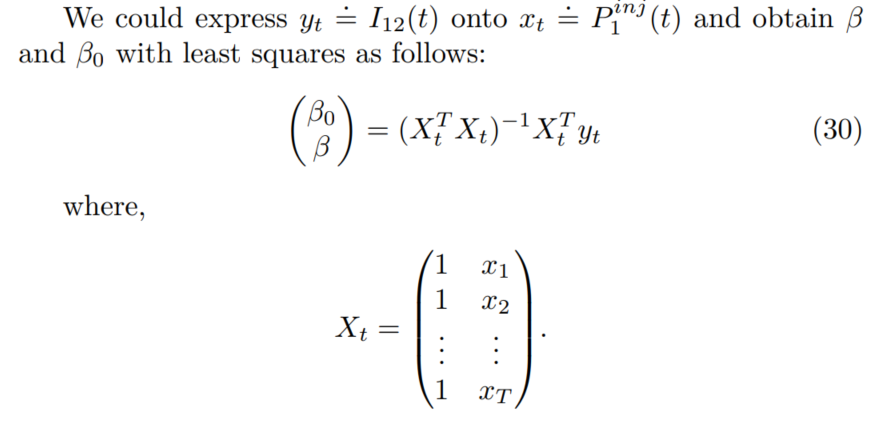

In [19]:
# Define the OLS regression relating the Current I12 with the Pinjection I1. See Equation (30) in the lecture notes
AA=np.ones((time,2))        #Vector Xt with ones
AA[:,1]=i1w[0:time]         #Vector Xt with ones in first column and wind injection in column 2 
AATransp=np.transpose(AA)
beta=np.dot(np.dot(np.linalg.inv(np.dot(AATransp,AA)),AATransp),i12[0:time])  # Beta values
print ("The value of Betas, using OLS, are:\n",beta)

The value of Betas, using OLS, are:
 [0.20178665 0.32969524]


<b>Plot initial data

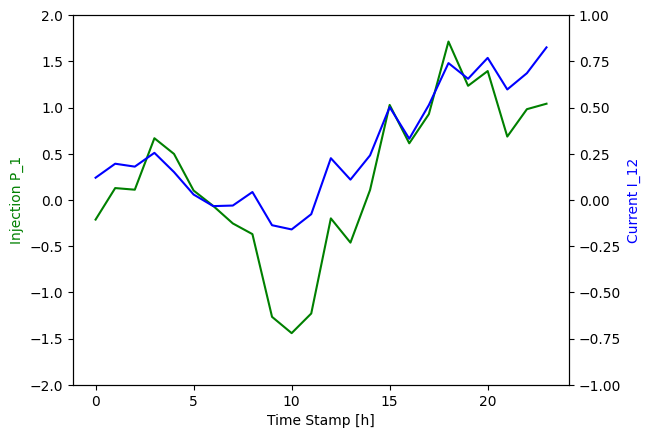

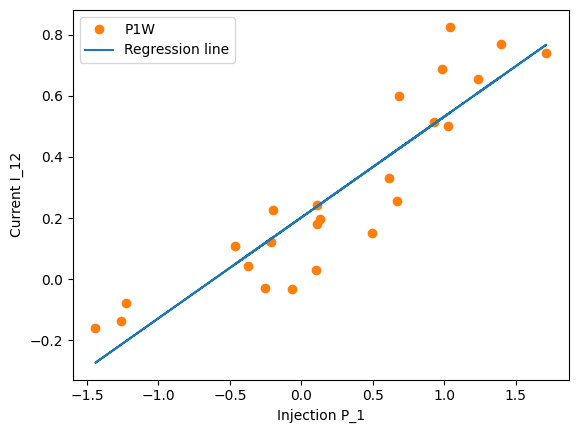

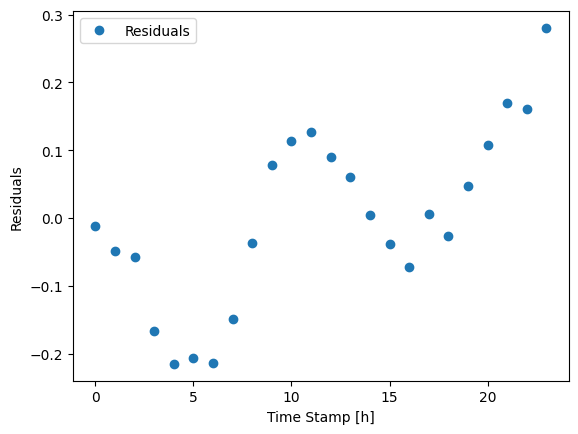

In [20]:

# Define the plots
x = range(time)
yy1 = i12[0:time]
yy2 = i1w[0:time]
rss_1=beta[0]+np.dot(beta[1],i1w[0:time])   #OLS regresion line
yy3 = rss_1
yy4 = i12[0:time]-beta[0]-np.dot(beta[1],i1w[0:time])

#First Graph (Pinjection in bus 1 and Current I12)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, yy2, 'g-')
ax2.plot(x, yy1, 'b-')
ax1.set_xlabel('Time Stamp [h]')
ax1.set_ylabel('Injection P_1', color='g')
ax2.set_ylabel('Current I_12', color='b')
ax1.set_ylim([-2, 2])
ax2.set_ylim([-1, 1])
plt.xlabel("Time Stamp [h]")
plt.show()

#Second Graph (Relation I1 vs I12 and OLS regression)
plt.plot(yy2, yy1, 'C1o', label='P1W')
plt.plot(yy2, yy3, label='Regression line')
plt.legend()
plt.xlabel("Injection P_1")
plt.ylabel("Current I_12")
plt.show()

#Third Graph (Residuals - Difference between the real current I12 and the one obtained by OLS regression)
plt.plot(x, yy4, 'C0o', label='Residuals')
plt.legend()
plt.xlabel("Time Stamp [h]")
plt.ylabel("Residuals")
plt.show()


<b>Durbin-Watson statistic

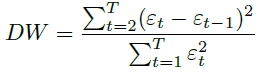

- The Durbin Watson statistic is a test for autocorrelation in a data set.
- The DW statistic always has a value between zero and 4.0.
- A value of 2.0 means there is no autocorrelation detected in the sample. Values from zero to 2.0 indicate positive autocorrelation and values from 2.0 to 4.0 indicate negative autocorrelation.

<sub>https://www.investopedia.com/terms/d/durbin-watson-statistic.asp

In [21]:
dw1 = np.sum((rss_1[1:time-1]-rss_1[0:time-2])**2)  # numerator 
dw2 = np.sum((rss_1[0:time-2])**2)                  # denominator
D = np.divide(dw1,dw2) 
ro = 1-D/2
print ("The value of Durdin-Watson (DW) is:",D)
print ("The value of rho is: ",ro)

The value of Durdin-Watson (DW) is: 0.19728601271078208
The value of rho is:  0.901356993644609


<b>Cochrane Orcutt

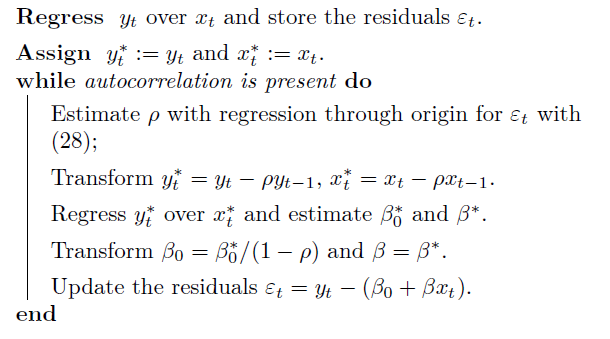

In [22]:
res_1=i12[0:time]-rss_1
for k in range(3):                   # According to "Applied Linear Statistical Models" if the OC methot does not converge 
                                     # in three iterations, we should use other method
    r2=res_1[0:time-1]
    r1=res_1[1:time]
    ro=0.97*np.dot(np.dot((np.dot(np.transpose(r2),r2))**(-1),np.transpose(r2)),r1) #Estimate Rho based on (28) 
    i1w_s=i1w[1:time]-np.dot(ro,i1w[0:time-1])   #Transform yt*=yt
    i12_s=i12[1:time]-np.dot(ro,i12[0:time-1])   #Transform xt*=Xt
    B=np.ones((time-1,2))
    B[:,1]=i1w_s
    b_s=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(B),B)),np.transpose(B)),np.transpose(i12_s)) #Regress yt* over xt*
    
    b_s[0]=np.divide(b_s[0],1-ro)               # Transform Beta_0
    rss_s=b_s[0]+np.dot(b_s[1],i1w_s[0:time-1]) # Update residuals
    rss_2=b_s[0]+np.dot(b_s[1],i1w[0:time])  
    res_2=i12[0:time]-rss_2
    res_1=res_2[:]                 
b_ss=b_s

<b>Forecast Day-ahead (Current <i>I<sub>12</sub></i>)

In [23]:
I12f1=beta[0]+np.dot(beta[1],i1w[time:time+timeForecast]) #using Ordinary least Squares (OLS)
I12f2=b_ss[0]+np.dot(b_ss[1],i1w[time:time+timeForecast]) #using Cochrane-Orcutt (CO)
print ("Forecast Corrent I12 considering OLS:",I12f1,"\n")
print ("Forecast Corrent I12 considering CO:",I12f2)

Forecast Corrent I12 considering OLS: [-0.03852579 -0.16027461 -0.23984907 -0.00887059  0.27985551  0.30672642
  0.45931817  0.40841983  0.37159782  0.40711795  0.22802822  0.7088563 ] 

Forecast Corrent I12 considering CO: [0.24980116 0.15115933 0.08668748 0.27382803 0.50775615 0.52952716
 0.65315818 0.61191995 0.58208647 0.61086516 0.46576528 0.8553359 ]


<b>Plot forecsated values

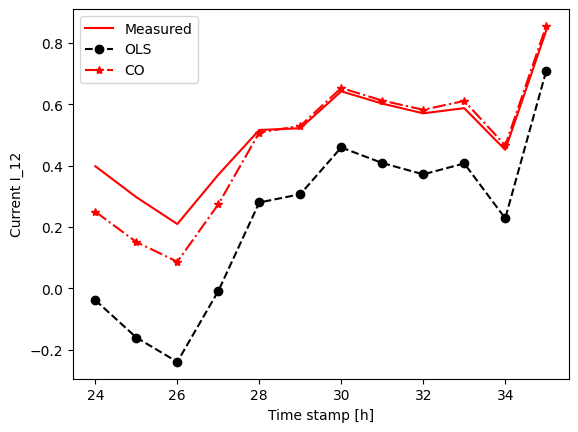

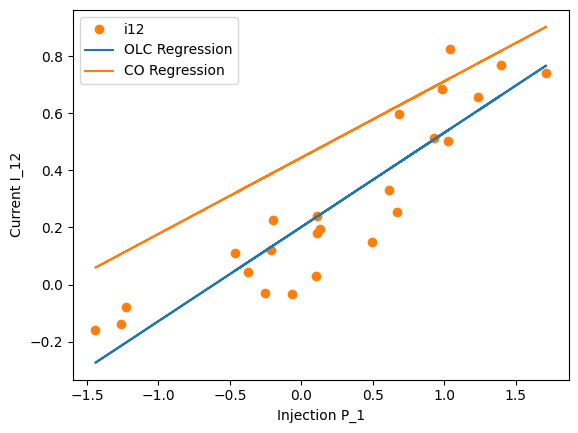

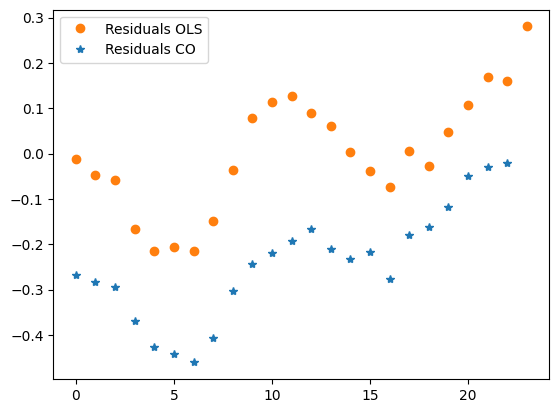

In [24]:
x = range(time)
xx = range(time-1)
xxx = range(time,time+timeForecast)

yy1 = i12[0:time]
yy2 = i1w[0:time]
yy3 = rss_1
yy4 = rss_2
yy5 = i12[0:time]-rss_1
yy6 = i12[0:time-1]-rss_2[0:time-1]
yy7 = i12[time:time+timeForecast]
yy8 = I12f1
yy9 = I12f2

plt.plot(xxx, yy7,  color='red', label='Measured')
plt.plot(xxx, yy8, color='black', linestyle='dashed', marker='o', label='OLS')
plt.plot(xxx, yy9, color='red', linestyle='-.', marker='*', label='CO')
plt.legend()
plt.xlabel('Time stamp [h]')
plt.ylabel('Current I_12')
plt.show()

plt.plot(yy2, yy1, 'C1o', label='i12')
plt.plot(yy2, yy3, label='OLC Regression')
plt.plot(yy2, yy4, label='CO Regression')
plt.legend()
plt.xlabel("Injection P_1")
plt.ylabel("Current I_12")
plt.show()

plt.plot(x, yy5, 'C1o', label='Residuals OLS')
plt.plot(xx, yy6, 'C0*', label='Residuals CO')
plt.legend()
plt.show()


<b>Autocorrelation Method 

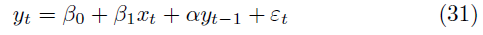

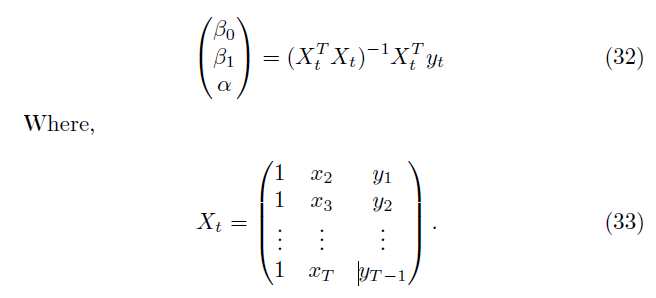

In this example, the input data is different because the error used to generate the values is different. To obtain the same results, we should use the next values. To compare with previous example, we can skip this step.

In [25]:
ee1 = [ 0.2878,   0.0145,   0.5846,  -0.0029,  -0.2718,  -0.1411,
       -0.2058,  -0.1793,  -0.9878,  -0.4926,  -0.1480,   0.7222,
       -0.3123,   0.4541,   0.9474,  -0.1584,   0.4692,   1.0173,
       -0.0503,   0.4684,  -0.3604,   0.4678,   0.3047,  -1.5098,
       -0.5515,  -0.5159,   0.3657,   0.7160,   0.1407,   0.5424,
        0.0409,   0.0450,   0.2365,  -0.3875,   1.4783,  -0.8487]

ee =  [ 0.2226,  -0.2293,  -0.1757,  -0.1691,  -0.2031,  -0.5900,
       -0.0556,  -0.0845,  -0.1834,   0.2798,   0.1534,   0.0751,
       -0.1089,   0.3545,   0.0228,  -0.2139,   0.4409,   0.6044,
       -0.2187,  -0.1233,   0.0026,   0.4980,   0.3703,   0.0812,
        0.1183,   0.2486,  -0.0686,  -0.0727,  -0.0009,  -0.1180,
        0.2443,   0.6224,  -0.4600,  -0.3878,   0.4734,  -0.4050]

II=np.zeros((nBus-1,time+timeForecast), dtype=complex)
II[:,0]=I
i12=np.zeros(time+timeForecast)
i1w=np.zeros(time+timeForecast)

v=1+np.dot(np.linalg.inv(Yl),I)
i12[0]=np.absolute(np.dot(Y[0,1],v[0]-v[1]))
i1w[0]=np.real(I[0])
for t in range(time+timeForecast-1):
    II[:,t+1]=0.95*II[:,t]+ee[t]
    i1w[t+1]=0.75*i1w[t]+ee1[t]
    II[0,t+1]=i1w[t+1]+np.complex(0,np.imag(II[0,t+1]))
    v=1+np.dot(np.linalg.inv(Yl),II[:,t+1])
    I12=np.dot(-Y[0,1],v[0]-v[1])
    i12[t+1]=np.absolute(I12)*np.sign(np.real(I12)) 



AttributeError: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<b> Models
- 1 - OLS 
- 2 - Cochrane Orcutt (CO)
- 3 - Autorregration AR(1) 
- 4 - Autorregration with Loads AR(1)+Load Sum

In [4]:
#1 - OLS
#2 - Cochrane Orcutt (CO)
#3 - Autorregration AR(1)
#4 - Autorregration with Loads AR(1)+Load Sum

NameError: name 'Xd' is not defined

<b>Forecast Day-ahead (Current <i>I<sub>12</sub></i>)

In [ ]:
# 1 - OLS 
# 2 - Cochrane Orcutt (CO)
# 3 - Autorregration AR(1) 
# 4 - Autorregration with Loads AR(1)+Load Sum

<b>Plot forecsated values

<b>Durbin-Watson statistic

# Homework Project Goals
Think about an interesting variation to this problem or a different way to solve and implement it !!!

Some ideas:
- Use <i>P<sub>2</sub></i> from the example to define the same stationary process for all grid loads, i.e., make <i>t : Pt = P2 </i>and use the data on <i>x<sub>t</sub>, t = 1, . . . , 12</i> from Fig. 27 as wind power output, <i>W<sub>t</sub></i>. Compute the current <i>I<sub>12</sub></i> with <i>Y<sup>−1</sup></i> and regress it (with AR(1)) over loads’ first 12-periods data to predict the following 12-periods. Analyse the residuals’ autocorrelation.
- Use the Cochrane–Orcutt transformation to correct for the autocorrelation of the residuals and re-run the prediction.
Did the transformation improve the prediction? Why?
- In the example, Explore other methods to correct for the autocorrelation of the residuals and re-run the prediction (suggestion: see M. H. Kutner, C. Nachtsheim, J. Neter, and W. Li, Applied linear
statistical models. Boston: McGraw-Hill Irwin, 2005.) Did the transformation improve the prediction of the current? Why?

Due to very little amount fo the data, the models performed below expected.

(Explain a little about how Gradient Boosting works) and why it performed so badly